In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [4]:
mydata = pd.read_csv('./project_data.csv')
mydata.head(5)

,week,ord_cnt,S2,S500,M2,M500
0,201608,1,2,0,0,0
1,201613,2,0,0,5,0
2,201614,10,0,0,63,4
3,201615,6,0,0,42,0
4,201616,1,2,0,0,0


<AxesSubplot:ylabel='Frequency'>

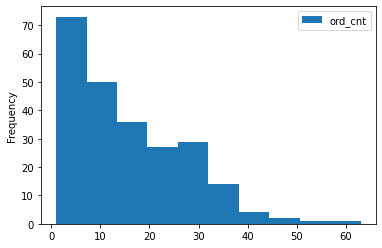

In [5]:
mydata.plot(kind='hist',  y='ord_cnt' )

In [6]:
correlation = mydata['M2'].corr(mydata['M500'])
print('correlation between x1 and x2: ', correlation)

correlation between x1 and x2:  0.43127556281304336


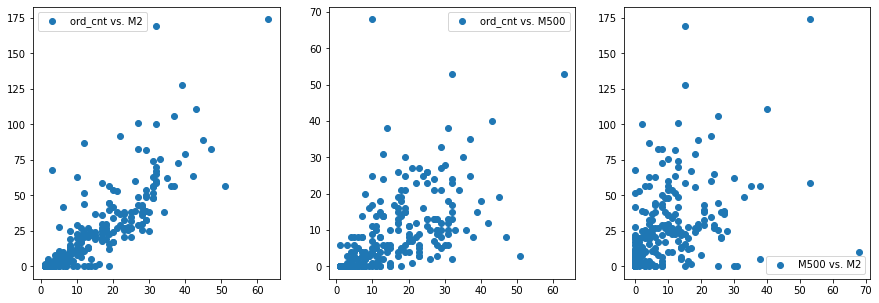

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(mydata['ord_cnt'],mydata['M2'],label = 'ord_cnt vs. M2')
ax[0].legend()
ax[1].scatter(mydata['ord_cnt'],mydata['M500'],label = 'ord_cnt vs. M500')
ax[1].legend()
ax[2].scatter(mydata['M500'],mydata['M2'],label = 'M500 vs. M2')
ax[2].legend()
plt.show()

In [8]:
mydata.shape

(237, 6)

In [15]:
corr = mydata.drop(columns = ['week']).corr()
corr

,ord_cnt,S2,S500,M2,M500
ord_cnt,1.000000,0.336396,0.230829,0.808933,0.567009
S2,0.336396,1.000000,0.150695,0.182670,0.164580
S500,0.230829,0.150695,1.000000,0.135141,0.126263
M2,0.808933,0.182670,0.135141,1.000000,0.431276
M500,0.567009,0.164580,0.126263,0.431276,1.000000


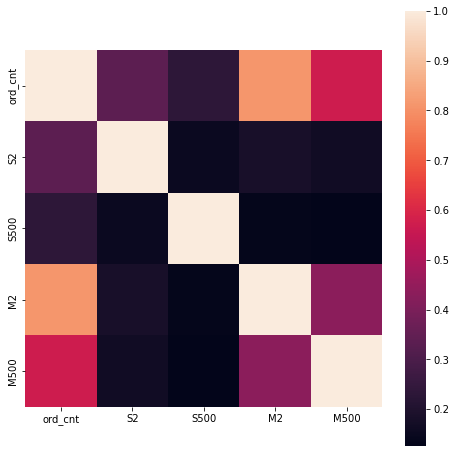

In [10]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True);

<Figure size 792x792 with 0 Axes>

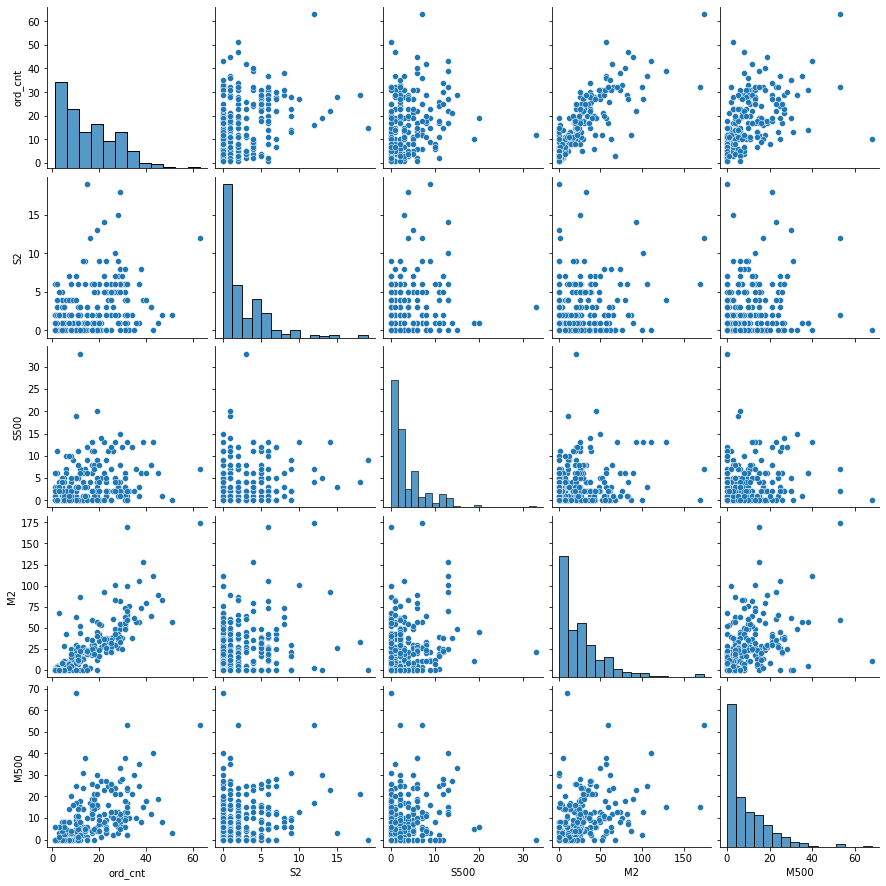

In [17]:
plt.figure(figsize=(11,11))
sns.pairplot(mydata.drop(columns = ['week']))

In [18]:
import numpy as np
np.random.seed(42)
train = np.random.choice(mydata.shape[0], int(0.7 * mydata.shape[0]), replace=False)
validation = [i for i in range(mydata.shape[0]) if i not in train]

In [19]:
mydata.shape[0]

237

In [20]:
train

array([115,  15, 211, 126,   6, 170,   9, 221, 112, 220, 182, 137,  30,
       193, 113,  55,  24, 205,  86,  19, 206, 120, 141, 234,  10, 218,
       172, 109,  75,  25, 124, 185, 235,  18,  68,  60, 148, 204, 114,
        73,  82,  45,  16,  93, 186, 167,  38, 127, 183, 201, 230,  95,
       190,  84, 158,  97, 147, 184,  79, 154, 125, 119,  66, 216,  67,
       209,  69, 101, 232, 173, 108,  29, 117, 224, 150,   5,  56, 227,
       143,  96,  65, 194, 200, 140,  31,  12,  35,  28,  42, 111, 132,
       159,  51, 136, 198,  76,  41, 104, 144,  78, 139,  26, 228, 155,
       176, 164,   0,   2,  77,  46, 100, 146, 142, 199,  90,  85, 165,
       156,  98,  36, 138,  61,  22, 118, 153, 162,  33,  11, 231,  27,
       212,   4, 122,  32, 168,  62, 135, 128, 213, 177,  70, 180,  64,
        44, 152,  40, 123,  23, 175, 171,  81,  39, 197,  47,  94, 178,
        43, 145, 161,   3, 105,  53, 133, 225, 181])

In [21]:
validation

[1,
 7,
 8,
 13,
 14,
 17,
 20,
 21,
 34,
 37,
 48,
 49,
 50,
 52,
 54,
 57,
 58,
 59,
 63,
 71,
 72,
 74,
 80,
 83,
 87,
 88,
 89,
 91,
 92,
 99,
 102,
 103,
 106,
 107,
 110,
 116,
 121,
 129,
 130,
 131,
 134,
 149,
 151,
 157,
 160,
 163,
 166,
 169,
 174,
 179,
 187,
 188,
 189,
 191,
 192,
 195,
 196,
 202,
 203,
 207,
 208,
 210,
 214,
 215,
 217,
 219,
 222,
 223,
 226,
 229,
 233,
 236]

In [22]:
X_train = mydata.iloc[train, :].drop(columns = ['week', 'M2'])
y_train = np.reshape(np.array(mydata.loc[train, 'M2']), (-1,1))

In [23]:
X_train

,ord_cnt,S2,S500,M500
115,27,5,5,24
15,6,2,2,2
211,11,1,3,1
126,31,8,3,6
6,12,2,0,4
...,...,...,...,...
105,31,6,1,13
53,17,1,0,15
133,32,4,13,13
225,4,3,4,0


In [24]:
y_train

array([[ 29],
       [  8],
       [ 12],
       [ 63],
       [ 87],
       [ 21],
       [ 68],
       [  0],
       [ 89],
       [ 19],
       [ 24],
       [ 35],
       [  9],
       [ 22],
       [174],
       [ 52],
       [  5],
       [  8],
       [ 38],
       [  2],
       [  0],
       [ 27],
       [ 12],
       [  0],
       [ 10],
       [  0],
       [ 43],
       [ 26],
       [ 60],
       [  1],
       [ 82],
       [ 10],
       [  0],
       [  3],
       [ 64],
       [ 38],
       [ 19],
       [ 22],
       [ 56],
       [ 26],
       [ 38],
       [  4],
       [  1],
       [  0],
       [ 32],
       [ 59],
       [  8],
       [ 17],
       [  8],
       [ 17],
       [  0],
       [ 27],
       [ 21],
       [ 52],
       [101],
       [ 30],
       [ 21],
       [ 25],
       [ 65],
       [ 22],
       [ 27],
       [ 79],
       [ 45],
       [  0],
       [ 76],
       [  7],
       [ 50],
       [ 48],
       [  0],
       [  7],
       [ 42],
      

In [25]:
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model.score(X_train, y_train))
print('model coefficients:\n', my_model.coef_, '\nintercept: ',my_model.intercept_)

R2 score is  0.6462484197575528
model coefficients:
 [[ 2.12472304 -0.63033264 -0.60764937 -0.15318489]] 
intercept:  [-1.63458559]


In [26]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

the root mean square error is  17.178024002222458


In [27]:
oos = validation
X_val = mydata.iloc[oos, :].drop(columns = ['week', 'M2'])
y_val = mydata.loc[oos, 'M2']
lin_model1 = LinearRegression()
my_model1 = lin_model1.fit(X_val, y_val)
val_pred = my_model1.predict(X_val)
val_RMSE = mean_squared_error(val_pred, y_val, squared = False)
print('the validation RMSE is ', val_RMSE)

the validation RMSE is  14.19931387501199


In [28]:
r2_score = my_model1.score(X_val, y_val)
print('R2 score is ', r2_score)

R2 score is  0.7429362242057336


In [29]:
X = mydata[['S2', 'S500', 'M500', 'ord_cnt']]
y = mydata['M2']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                                    test_size=0.3, random_state=88, shuffle=True)

In [31]:
X_train

,S2,S500,M500,ord_cnt
94,12,4,17,16
74,1,5,7,21
78,1,6,38,31
161,3,2,25,19
234,6,0,0,2
...,...,...,...,...
106,6,3,25,37
177,5,7,5,18
207,1,5,4,4
32,2,0,4,7


In [32]:
lin_model = LinearRegression()
my_model2 = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model2.score(X, y))
print('model coefficients:\n', my_model2.coef_, '\nintercept: ',my_model.intercept_)

R2 score is  0.6631541827604132
model coefficients:
 [-0.8421042  -0.07992391  0.01345944  2.02372279] 
intercept:  [-1.63458559]


In [33]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y, my_model2.predict(X), squared =False)
print('the root mean square error is ', RMSE)

the root mean square error is  16.68422610593119


In [34]:
my_model2.coef_

array([-0.8421042 , -0.07992391,  0.01345944,  2.02372279])

In [35]:
print('var\t coef\t\t\t range')
for coef, var in enumerate(mydata.columns[1:-1]):
    print(var, '\t', round(my_model2.coef_[coef], 5),\
          '\twith range ', round(float(mydata[var].max() - mydata[var].min()), 2))

var	 coef			 range
ord_cnt 	 -0.8421 	with range  62.0
S2 	 -0.07992 	with range  19.0
S500 	 0.01346 	with range  33.0
M2 	 2.02372 	with range  174.0


In [36]:
scales = dict()
X = mydata.iloc[train, 1:-1]
X

,ord_cnt,S2,S500,M2
115,27,5,5,29
15,6,2,2,8
211,11,1,3,12
126,31,8,3,63
6,12,2,0,87
...,...,...,...,...
105,31,6,1,74
53,17,1,0,59
133,32,4,13,70
225,4,3,4,0


In [37]:
y = mydata.loc[train, 'M2']
y

115    29
15      8
211    12
126    63
6      87
       ..
105    74
53     59
133    70
225     0
181    24
Name: M2, Length: 165, dtype: int64

In [30]:
for col in mydata.columns[1:-1]:
    min = mydata[col].min()
    max = mydata[col].max()
    range = max - min
    scales.update({col : dict({'Xmin' : min, 'Xmax' : max, 'Xrange' : range})})
    X[col] = (mydata[col] - min) / range
X

,ord_cnt,S2,S500,M2
115,0.419355,0.263158,0.151515,0.166667
15,0.080645,0.105263,0.060606,0.045977
211,0.161290,0.052632,0.090909,0.068966
126,0.483871,0.421053,0.090909,0.362069
6,0.177419,0.105263,0.000000,0.500000
...,...,...,...,...
105,0.483871,0.315789,0.030303,0.425287
53,0.258065,0.052632,0.000000,0.339080
133,0.500000,0.210526,0.393939,0.402299
225,0.048387,0.157895,0.121212,0.000000


In [31]:
scales = pd.DataFrame.from_dict(scales).T
print(scales)
X.describe().T

         Xmin  Xmax  Xrange
ord_cnt     1    63      62
S2          0    19      19
S500        0    33      33
M2          0   174     174


,count,mean,std,min,25%,50%,75%,max
ord_cnt,165.0,0.247019,0.192338,0.0,0.080645,0.209677,0.387097,1.000000
S2,165.0,0.122169,0.146461,0.0,0.000000,0.052632,0.210526,0.789474
S500,165.0,0.101928,0.133777,0.0,0.000000,0.060606,0.151515,1.000000
M2,165.0,0.160989,0.166493,0.0,0.028736,0.126437,0.241379,1.000000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
X = mydata.iloc[train, 1:-1]
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.41935484, 0.33333333, 0.15151515, 0.16666667],
       [0.08064516, 0.13333333, 0.06060606, 0.04597701],
       [0.16129032, 0.06666667, 0.09090909, 0.06896552],
       [0.48387097, 0.53333333, 0.09090909, 0.36206897],
       [0.17741935, 0.13333333, 0.        , 0.5       ],
       [0.38709677, 0.33333333, 0.36363636, 0.12068966],
       [0.03225806, 0.        , 0.        , 0.3908046 ],
       [0.        , 0.        , 0.09090909, 0.        ],
       [0.70967742, 0.06666667, 0.18181818, 0.51149425],
       [0.11290323, 0.        , 0.15151515, 0.1091954 ],
       [0.30645161, 0.06666667, 0.24242424, 0.13793103],
       [0.38709677, 0.26666667, 0.        , 0.20114943],
       [0.08064516, 0.26666667, 0.        , 0.05172414],
       [0.22580645, 0.06666667, 0.36363636, 0.12643678],
       [1.        , 0.8       , 0.21212121, 1.        ],
       [0.17741935, 0.        , 0.        , 0.29885057],
       [0.06451613, 0.13333333, 0.        , 0.02873563],
       [0.09677419, 0.46666667,

In [34]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3
0,0.419355,0.333333,0.151515,0.166667
1,0.080645,0.133333,0.060606,0.045977
2,0.161290,0.066667,0.090909,0.068966
3,0.483871,0.533333,0.090909,0.362069
4,0.177419,0.133333,0.000000,0.500000
...,...,...,...,...
160,0.483871,0.400000,0.030303,0.425287
161,0.258065,0.066667,0.000000,0.339080
162,0.500000,0.266667,0.393939,0.402299
163,0.048387,0.200000,0.121212,0.000000


In [35]:
X_scaled.columns = mydata.columns[1:-1]
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ord_cnt,165.0,0.247019,0.192338,0.0,0.080645,0.209677,0.387097,1.0
S2,165.0,0.154747,0.185517,0.0,0.000000,0.066667,0.266667,1.0
S500,165.0,0.101928,0.133777,0.0,0.000000,0.060606,0.151515,1.0
M2,165.0,0.160989,0.166493,0.0,0.028736,0.126437,0.241379,1.0


In [36]:
# print the scaled data
print(scaler.data_range_)
print(scaler.data_max_)
print(scaler.data_min_)

[ 62.  15.  33. 174.]
[ 63.  15.  33. 174.]
[1. 0. 0. 0.]


In [37]:
lin_model = LinearRegression()
y = np.reshape(np.array(mydata.loc[train, 'M2']), (-1, 1))
my_model3 = lin_model.fit(X_scaled, y)

In [38]:
my_model3.coef_.shape

(1, 4)

In [39]:
print('var\t coef\t\t\t range\t\t impact')

for coef, var in enumerate(mydata.columns[1:-1]):
    print(var, '\t', round(my_model3.coef_[0][coef], 5), '\twith range ', round(float(X_scaled[var].max() - X_scaled[var].min()),2),\
          '\ttotal impact', round(float(my_model3.coef_[0][coef]*(X_scaled[var].max() - X_scaled[var].min())),2))

var	 coef			 range		 impact
ord_cnt 	 0.0 	with range  1.0 	total impact 0.0
S2 	 0.0 	with range  1.0 	total impact 0.0
S500 	 -0.0 	with range  1.0 	total impact -0.0
M2 	 174.0 	with range  1.0 	total impact 174.0


In [40]:
my_model3.score(X_scaled, y)

1.0

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# auto-mpg.data.csv의 StandardScaler() 적용
my_data = pd.read_csv('project_data.csv')
X_train = my_data.iloc[train, :].drop(columns = ['week', 'M2'])
y = np.reshape(np.array(my_data.loc[train, 'M2']), (-1, 1))

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = my_data.columns[1:-1]
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ord_cnt,165.0,-7.981831e-17,1.003044,-1.288202,-0.867637,-0.194734,0.730508,3.926799
S2,165.0,-2.119517e-17,1.003044,-0.836679,-0.836679,-0.476230,0.605118,4.570061
S500,165.0,6.728624e-18,1.003044,-0.764250,-0.764250,-0.309831,0.371797,6.733659
M2,165.0,-3.160351e-17,1.003044,-0.885813,-0.796035,-0.257365,0.371084,5.219116


In [44]:
lin_model = LinearRegression()
my_model4 = lin_model.fit(X_scaled, y)
print('R2 score is ', my_model4.score(X_scaled, y))
print('model coefficients:\n', my_model4.coef_, '\nintercept: ', my_model4.intercept_)
RMSE = mean_squared_error(y, my_model4.predict(X_scaled), squared = False)
print('the root mean square error is ', RMSE)

R2 score is  0.6462484197575528
model coefficients:
 [[25.26036605 -1.74874119 -2.67440281 -1.70625604]] 
intercept:  [28.01212121]
the root mean square error is  17.178024002222458
